# Prediction of CO2 emissions from country-specific data
# A Machine Learning project 
### by Vladislav Todorov

***

# Stage 2: Data exploration and visualization

***

### Notebook Contents:
0. Introduction
1. Notebook setup - libraries and data import, notes on the data source
2. Global data overview
3. Feature/column abbreviations and units
4. Definition of the hypothesis to be tested
5. Feature engineering
    - features overview
    - derivation of additional important features
    - removal of unnecessary features
6. Prepare the visualization
7. Create plots 
    - a global look onto all relationships and detailed plots of chosen dependencies
    - correlation matrix heatmaps
    - scatterplots, histograms
    - detection of outliers
    - discussion of dependencies and trends
8. Conclusions

***

## 0. Introduction

### Project summary
**Aim of the project**:
Analysis of country-specific data and development of machine learning models in order to predict CO2 emissions from country parameters. The project uses the publicly available dataset Climate Change Data from the World Bank Group, which provides data on the vast majority of countries over a range of years for parameters such as:

* country: the vast majority of countries worldwide
* year: ranging from 1990 to 2011
* various emissions of greenhouse gases such as CO2, CH4, N2O, others
* population-specific parameters: population count, urban population, population growth, etc.
* country economic indicators: GDP, GNI, Foreign Direct Investment, etc.
* land-related parameters: cereal yield, agricultural land, Nationally terrestrial protected areas, etc.
* climate data: precipitations, national disasters, etc.
* energy use
* counts of certain types of medical personnel
* etc.

The project is divided into three stages:

1. Data cleaning and preparation
2. Data exploration and visualization
3. Predictive analysis with the Random Forest machine learning algorithm

Each of the stages is described in a separate Jupyter Notebook (.ipynb file) and a derived HTML file.

***

### Notebook summary - Stage 2: Data exploration and visualization

**Aim of this notebook**: The subject of this particular notebook is to gain first data insights from descriptive statistics, visualize relevant dependencies and identify global trends. This is especially necessary for the proper choice of relevant/important features and of suitable machine learning algorithms for the predictive analysis.

**Input**: cleaned dataset from the csv data file (output of Stage 1 of the project)

**Output**: plots, visualizations, summaries, trends, insights, conclusions

**Programming language**: Python 3.7

**Libraries used in this notebook**: seaborn, matplotlib, pandas, numpy

***

### Data source

The used data comes from the Climate Change Data of the World Bank Group, which provides country-specific data on parameters such as CO2 emissions, energy use, population count, urban population, cereal yield, nationally terrestrial protected areas, GDP, GNI, etc.


The dataset is publicly available at https://datacatalog.worldbank.org/dataset/climate-change-data and licenced under the <a href="https://datacatalog.worldbank.org/public-licenses#cc-by">Creative Commons Attribution 4.0 International license</a>.

***

## 1. Notebook Setup
Libraries and dataset import:

In [1]:
# import all needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# import the cleaned dataset from a csv file
data = pd.read_csv(r'data_cleaned.csv')

## 2. Global overview of the available data

A global overview of the imported data yields the following insights:

In [2]:
print("Shape of the dataset:")
data.shape

Shape of the dataset:


(1700, 18)

In [3]:
print("available columns and their data types:")
data.dtypes

available columns and their data types:


country                 object
year                     int64
cereal_yield           float64
fdi_perc_gdp           float64
en_per_gdp             float64
en_per_cap             float64
co2_ttl                float64
co2_per_cap            float64
co2_per_gdp            float64
pop_urb_aggl_perc      float64
prot_area_perc         float64
gdp                    float64
gni_per_cap            float64
under_5_mort_rate      float64
pop_growth_perc        float64
pop                    float64
urb_pop_growth_perc    float64
urb_pop                float64
dtype: object

In [4]:
print("Overview of the first 5 rows:")
data.head()

Overview of the first 5 rows:


,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,AGO,1991,417.4,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,10653515.0,6.687032,4.099473e+06
1,ARE,1991,1594.0,0.076475,245.977706,12262.388130,57010.849,29.851550,598.807980,26.377204,0.266886,3.391964e+10,19340.0,20.5,5.442852,1909812.0,5.265704,1.507988e+06
2,ARG,1991,2666.1,1.285579,173.122857,1434.960601,117021.304,3.536073,426.614517,39.119646,4.772468,1.897200e+11,3960.0,25.8,1.372593,33093579.0,1.762636,2.890393e+07
3,AUS,1991,1603.3,1.306912,208.686644,4926.727783,281530.258,16.288490,689.948873,60.356798,7.915273,3.299655e+11,18380.0,8.6,1.274577,17284000.0,1.438378,1.478473e+07
4,AUT,1991,5463.0,0.209142,128.939160,3381.073790,65888.656,8.448456,322.186648,19.746121,20.991143,1.721664e+11,21200.0,8.9,1.134999,7798899.0,1.134999,5.131676e+06


In [5]:
print("Descriptive statistics:")
data.describe()

Descriptive statistics:


,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1.700000e+03
mean,1999.570588,3013.317581,2.948940,249.822736,1968.979736,9.793999e+05,4.676663,482.303784,21.480126,12.201789,1.058568e+12,7898.668664,51.971955,1.451313,3.060142e+08,2.252231,1.347903e+08
std,5.143070,1796.206082,3.949722,186.195019,1959.419972,3.235692e+06,4.906273,392.192230,12.105158,9.116682,3.921323e+12,11592.516937,51.332162,1.129312,9.482329e+08,1.642009,4.145755e+08
min,1991.000000,175.700000,-15.027675,66.335372,116.511476,7.077310e+02,0.029411,45.552592,3.526316,0.000000,9.826326e+08,80.000000,3.200000,-2.397174,1.909812e+06,-2.757210,1.151309e+06
25%,1995.000000,1683.364736,0.834105,136.320490,542.882788,1.462125e+04,0.922769,257.139562,12.383953,5.839844,1.636221e+10,780.000000,10.000000,0.630306,9.973065e+06,0.925308,5.469794e+06
50%,2000.000000,2584.800000,1.993220,197.624918,1089.225939,7.728386e+04,3.093346,368.415567,18.525960,10.293791,9.882942e+10,2150.770301,32.350000,1.519890,2.689207e+07,2.315122,1.423239e+07
75%,2004.000000,3933.400000,3.702149,286.474936,2893.996077,3.708446e+05,7.441195,586.972993,28.988324,16.599298,4.122600e+11,9205.000000,79.925741,2.276853,8.234386e+07,3.364747,4.835246e+07
max,2008.000000,8410.800000,51.373951,1383.380011,12607.839262,3.064936e+07,37.106499,3343.454250,60.505780,53.749825,5.580488e+13,58620.000000,239.100000,11.180657,6.610030e+09,12.829046,3.264974e+09


## 3. Used feature/column abbreviations

The features/columns were given in Stage 1 clearer abbreviations in order to ensure easies understanding, representation and coding. These are listed in the following table together with the corresponding units:

<table>
    <tr>
        <td> <b> Variable name </b> </td>
        <td> <b> Description </b> </td>
        <td> <b> Unit </b> </td>
    </tr>
    <tr>
        <td> cereal_yield </td>
        <td> Cereal yield </td>
        <td> kg per hectare </td>
    </tr>
    <tr>
        <td> fdi_perc_gdp </td>
        <td> Foreign direct investment, net inflows </td>
        <td> % of GDP </td>
    </tr>
    <tr>
        <td> en_per_gdp </td>
        <td> Energy use per units of GDP </td>
        <td> kg oil eq./\$1,000 of 2005 PPP \$ </td>
    </tr>
    <tr>
        <td> en_per_cap </td>
        <td> Energy use per capita </td>
        <td> kilograms of oil equivalent </td>
    </tr>
    <tr>
        <td> co2_ttl </td>
        <td> CO2 emissions, total </td>
        <td> KtCO2 </td>
    </tr>
    <tr>
        <td> co2_per_cap </td>
        <td> CO2 emissions per capita </td>
        <td> metric tons </td>
    </tr>
    <tr>
        <td> co2_per_gdp </td>
        <td> CO2 emissions per units of GDP </td>
        <td> kg/\$1,000 of 2005 PPP \$ </td>
    </tr>
    <tr>
        <td> pop_urb_aggl_perc </td>
        <td> Population in urban agglomerations >1million </td>
        <td> % </td>
    </tr>
    <tr>
        <td> prot_area_perc </td>
        <td> Nationally terrestrial protected areas </td>
        <td> % of total land area </td>
    </tr>
    <tr>
        <td> gdp </td>
        <td> Gross Domestic Product (GDP) </td>
        <td> \$ </td>
    </tr>
    <tr>
        <td> gni_per_cap </td>
        <td> GNI per capita </td>
        <td> Atlas \$ </td>
    </tr>
    <tr>
        <td> under_5_mort_rate </td>
        <td> Under-five mortality rate </td>
        <td> per 1,000 </td>
    </tr>
    <tr>
        <td> pop_growth_perc </td>
        <td> Population growth </td>
        <td> annual % </td>
    </tr>
    <tr>
        <td> pop </td>
        <td> Population </td>
        <td> 1 </td>
    </tr>
    <tr>
        <td> urb_pop_growth_perc </td>
        <td> Urban population growth </td>
        <td> annual % </td>
    </tr>
    <tr>
        <td> urb_pop </td>
        <td> Urban population </td>
        <td> 1 </td>
    </tr>
    
</table>

***
## 4. Define the hypothesis to be investigated

The data series available can be summarized into the following country-specific parameter categories:

* various emissions of greenhouse gases such as CO2, CH4, N2O, others
* population-specific parameters: population count, urban population, population growth, etc.
* country economic indicators: GDP, GNI, Foreign Direct Investment, etc.
* land-related parameters: cereal yield, agricultural land, Nationally terrestrial protected areas, etc.
* climate data: precipitations, national disasters, etc.
* energy use
* counts of certain types of medical personnel
* etc.

The initial project goal of the project has already been defined during Stage 1:

**Initial goal of the project:** Analyze the relationships among the variable categories and evaluate the contribution of factors like country economy, energy use, land use, etc. on greenhouse gas emissions, precipitations, etc. Finally, develop a predictive machine learning model capable of predicting climate-related data or emissions from the other country-specific parameters.

Many of the features relating to climate data and emissions had to be removed in Stage 1 due to the big amount of missing values.

Without getting into much details here, it is generally considered that CO2 emissions are an important contributor to climate change. Taken for a certain country and year, these can be theoretically caused by energy use, country's population, economy, etc. Taking this and the available data into account, the hypothesis to be tested can be defined in more detail as follows:

**The hypothesis to be tested**: the CO2 emissions depend on the rest of the country-specific features available in the dataset such as energy use, various population metrics, GDP, FNI, cereal yield, etc. and can be predicted from these.

In this context, the CO2 emissions will be from now on treated as the Dependent Variable (DV) and I will investigate how/whether it depends on the other features/variables. 

***
## 5. Feature engineering

The available columns reveal that the features representing CO2 emissions and energy use have three different reference values:

   - per capita: *co2_per_cap* and *en_per_cap*
   - per unit of GDP: *co2_per_gdp* and *en_per_gdp*
   - total values: *co2_ttl*

Since the energy use is not available as a total value, an additional column will be derived by multiplying the value referred to a unit of GDP *'en-er_gdp'* with the column *'gdp'* and dividing by 1000 (The energy use per unit of GDP is defined in the dataset documentation as the energy use in kilograms of oil equivalent per  \\$1000 of GDP [kg oil eq./\\$1,000]).

Create a column for the total energy use:

In [6]:
# create a column for the total energy use
data['en_ttl'] = data['en_per_gdp'] * data['gdp'] /1000

### Choose the best unit/reference value for the CO2 emissions and the energy use

In order to select the best reference value to work with for the CO2 emissions and the energy use, their relationships with the other variables should be investigated. The aim here is to check which units allow for better correlation with the biggest amount of other features. This is done by examining the correlation matrix of all features:

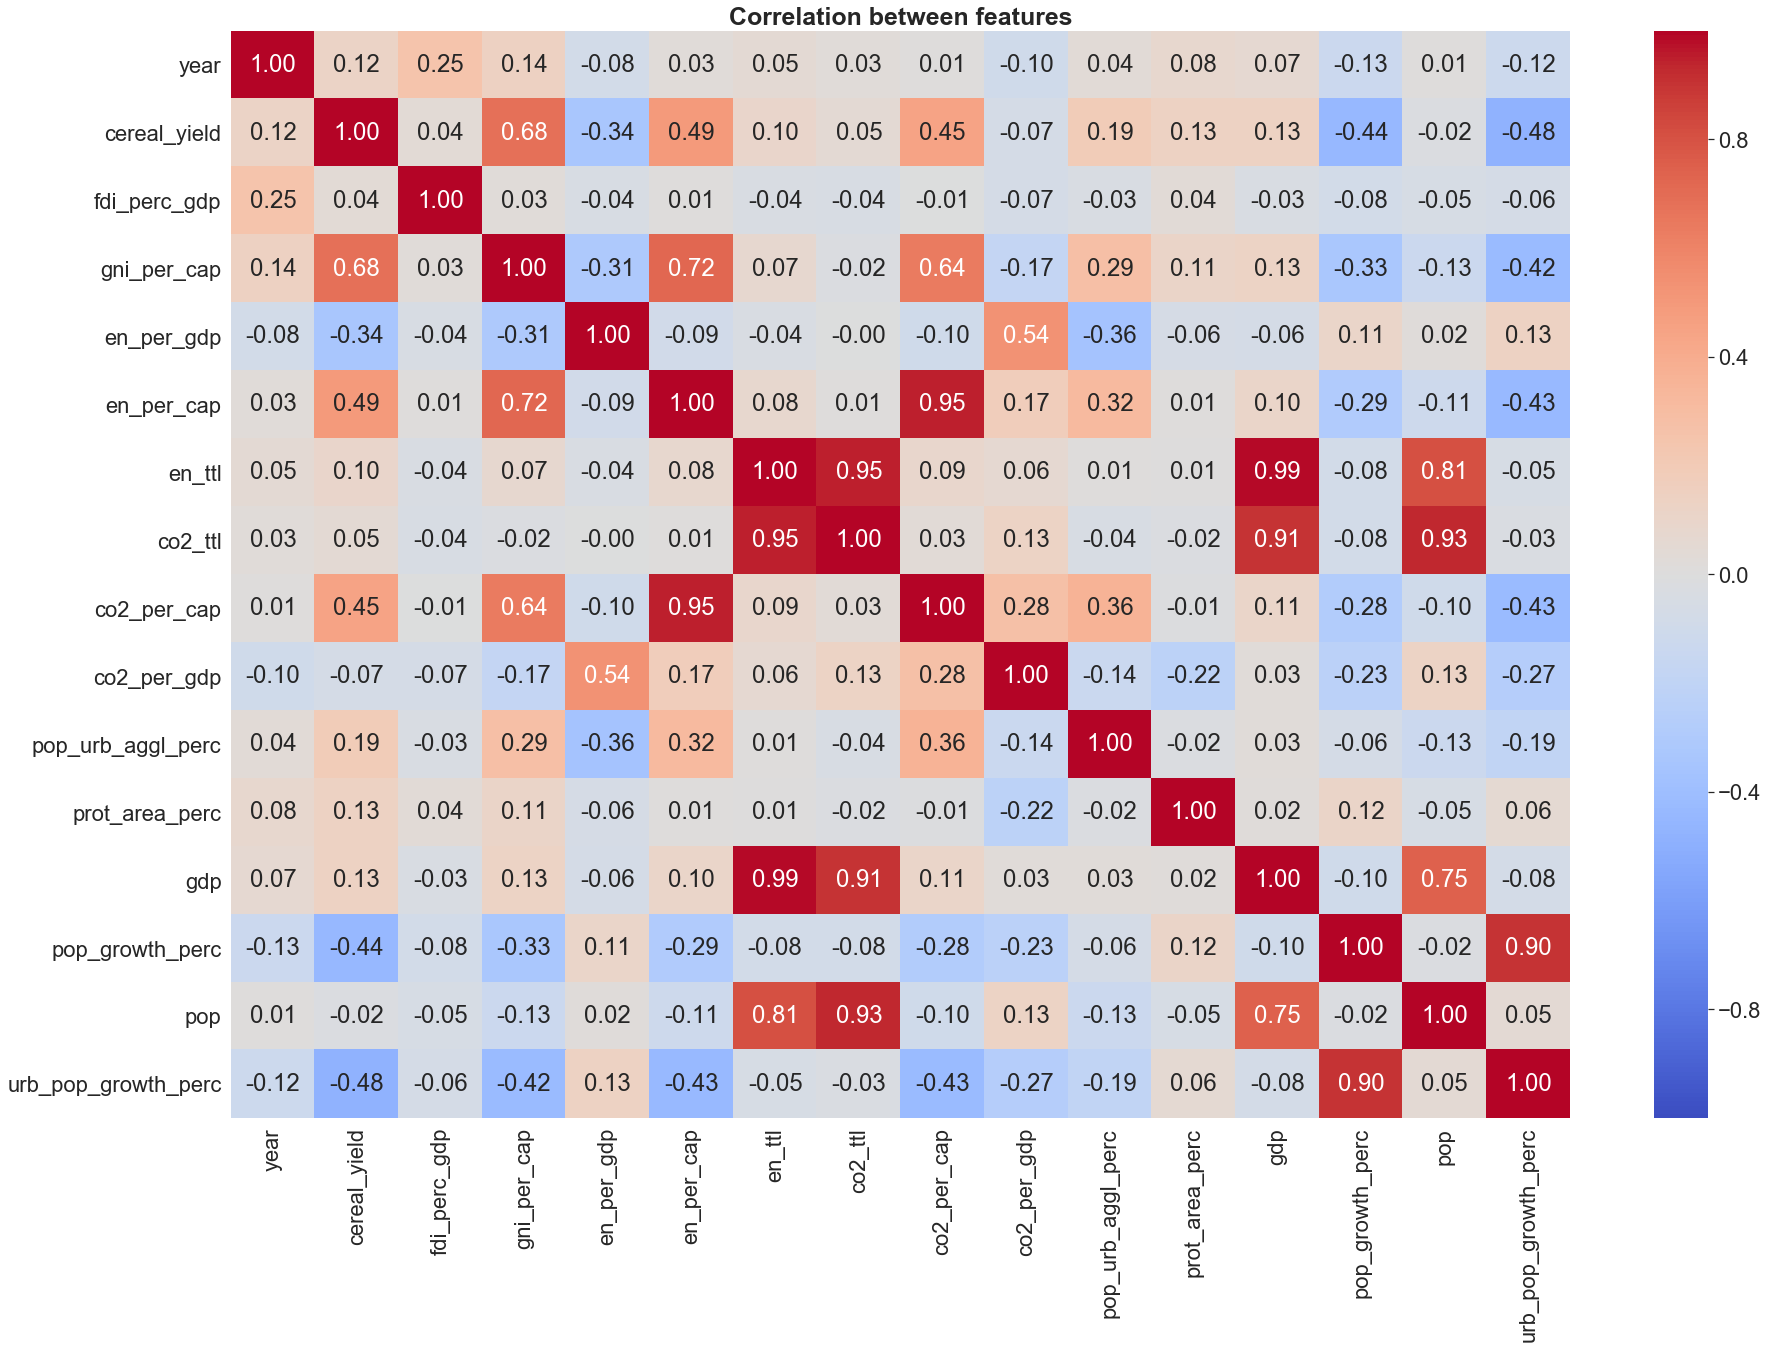

In [15]:
# select all features
features_all = data[['country','year','cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_gdp', 'en_per_cap', 'en_ttl', 'co2_ttl', 'co2_per_cap', 'co2_per_gdp', 'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'pop', 'urb_pop_growth_perc']]

# plot a correlation of all features
# correlation matrix
sns.set(font_scale=2)
f,ax=plt.subplots(figsize=(30,20))
sns.heatmap(features_all.corr(), annot=True, cmap='coolwarm', fmt = ".2f", center=0, vmin=-1, vmax=1)
plt.title('Correlation between features', fontsize=25, weight='bold' )
plt.show()

sns.set(font_scale=1)


When comparing the dependencies of *co2_ttl*, *co2_per_cap* and *co2_per_gdp* with other features, *co2_per_cap* correlates with a bigger amount of other variables. It also represents the CO2 emissions independently of population size, making it more representative when analyzing and comparing the emissions of countries with different sizes and population counts.

Since the chosen variables are referred to the population count, it wouldn't make much sence to take the variable *pop* (indicating the population count) - this can be also seen from the weak correlation coefficient.

Taking this into account, the features *pop*, *en_per_gdp*, *en_ttl*, *co2_per_gdp*, *co2_ttl* will be removed from further analysis:

In [8]:
features = features_all[['country','cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'co2_per_cap',
                     'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']]

***

## 6. Prepare the visualizations

### Plotting preparation

#### Ensure easier labeling of the plots
In order to make the labeling of the variables within plots easier in the code, a dictionary with the column names and variable labels to use on axes is defined:

In [9]:
# a dictionary with feature labels
labels_dict = {'gni_per_cap':'GNI per capita [Atlas $]',
               'gdp':'Gross Domestic Product [$]',
               'cereal_yield':'Cereal yield [kg/ha]',
               'prot_area_perc': 'Nationally terrestrial protected areas [% of total land area]',
               'fdi_perc_gdp': 'Foreign Direct Investment [% of GDP]',
               'pop_urb_aggl_perc': 'Population in urban agglomerations > 1mln [%]',
               'urb_pop_growth_perc':'Urban population growth [annual %]',
               'pop_growth_perc': 'Population growth [annual %]',
               'co2_per_cap':'CO2 emissions per capita [t]',
               'en_per_cap':'Energy use per capita [kg oil eq]' }

#### Choose a subset of countries to plot
The big amount of data points will result in slower processing of the plot and in a less clear representation. This can be avoided by choosing roughly half of the countries just for the paired scatter plot:

In [10]:
# select only rows for half of the countries chosen randomly in order to ensure better visibility
chosen_countries=['LIC', 'LMC', 'LMY', 'MAR', 'MEX', 'MIC', 'MNA', 'MOZ', 'MYS',
'NGA', 'NLD', 'NZL', 'PAK', 'PAN', 'PER', 'PHL', 'PRT', 'PRY',
'ROM', 'SAS', 'SAU', 'SDN', 'SEN', 'SLV', 'SSA', 'SWE', 'SYR',
'TGO', 'THA', 'TUR', 'TZA', 'UMC', 'URY', 'USA', 'VEN', 'VNM',
'WLD', 'ZAF', 'ZAR', 'ZMB', 'ECA', 'POL', 'RUS', 'UKR', 'YEM',
'ETH', 'BEL']

features_chosen = features[features['country'].isin(chosen_countries)]

***

## 7. Create plots and visualizations

The visualization is organized in a way that global overview of the data and dependencies is presented first, followed by more and more detailed representations of the more relevant relationships.

### 7.1 A global look onto all relationships

Scatter plots of all chosen variables and countries will give a first impression of possible trends:

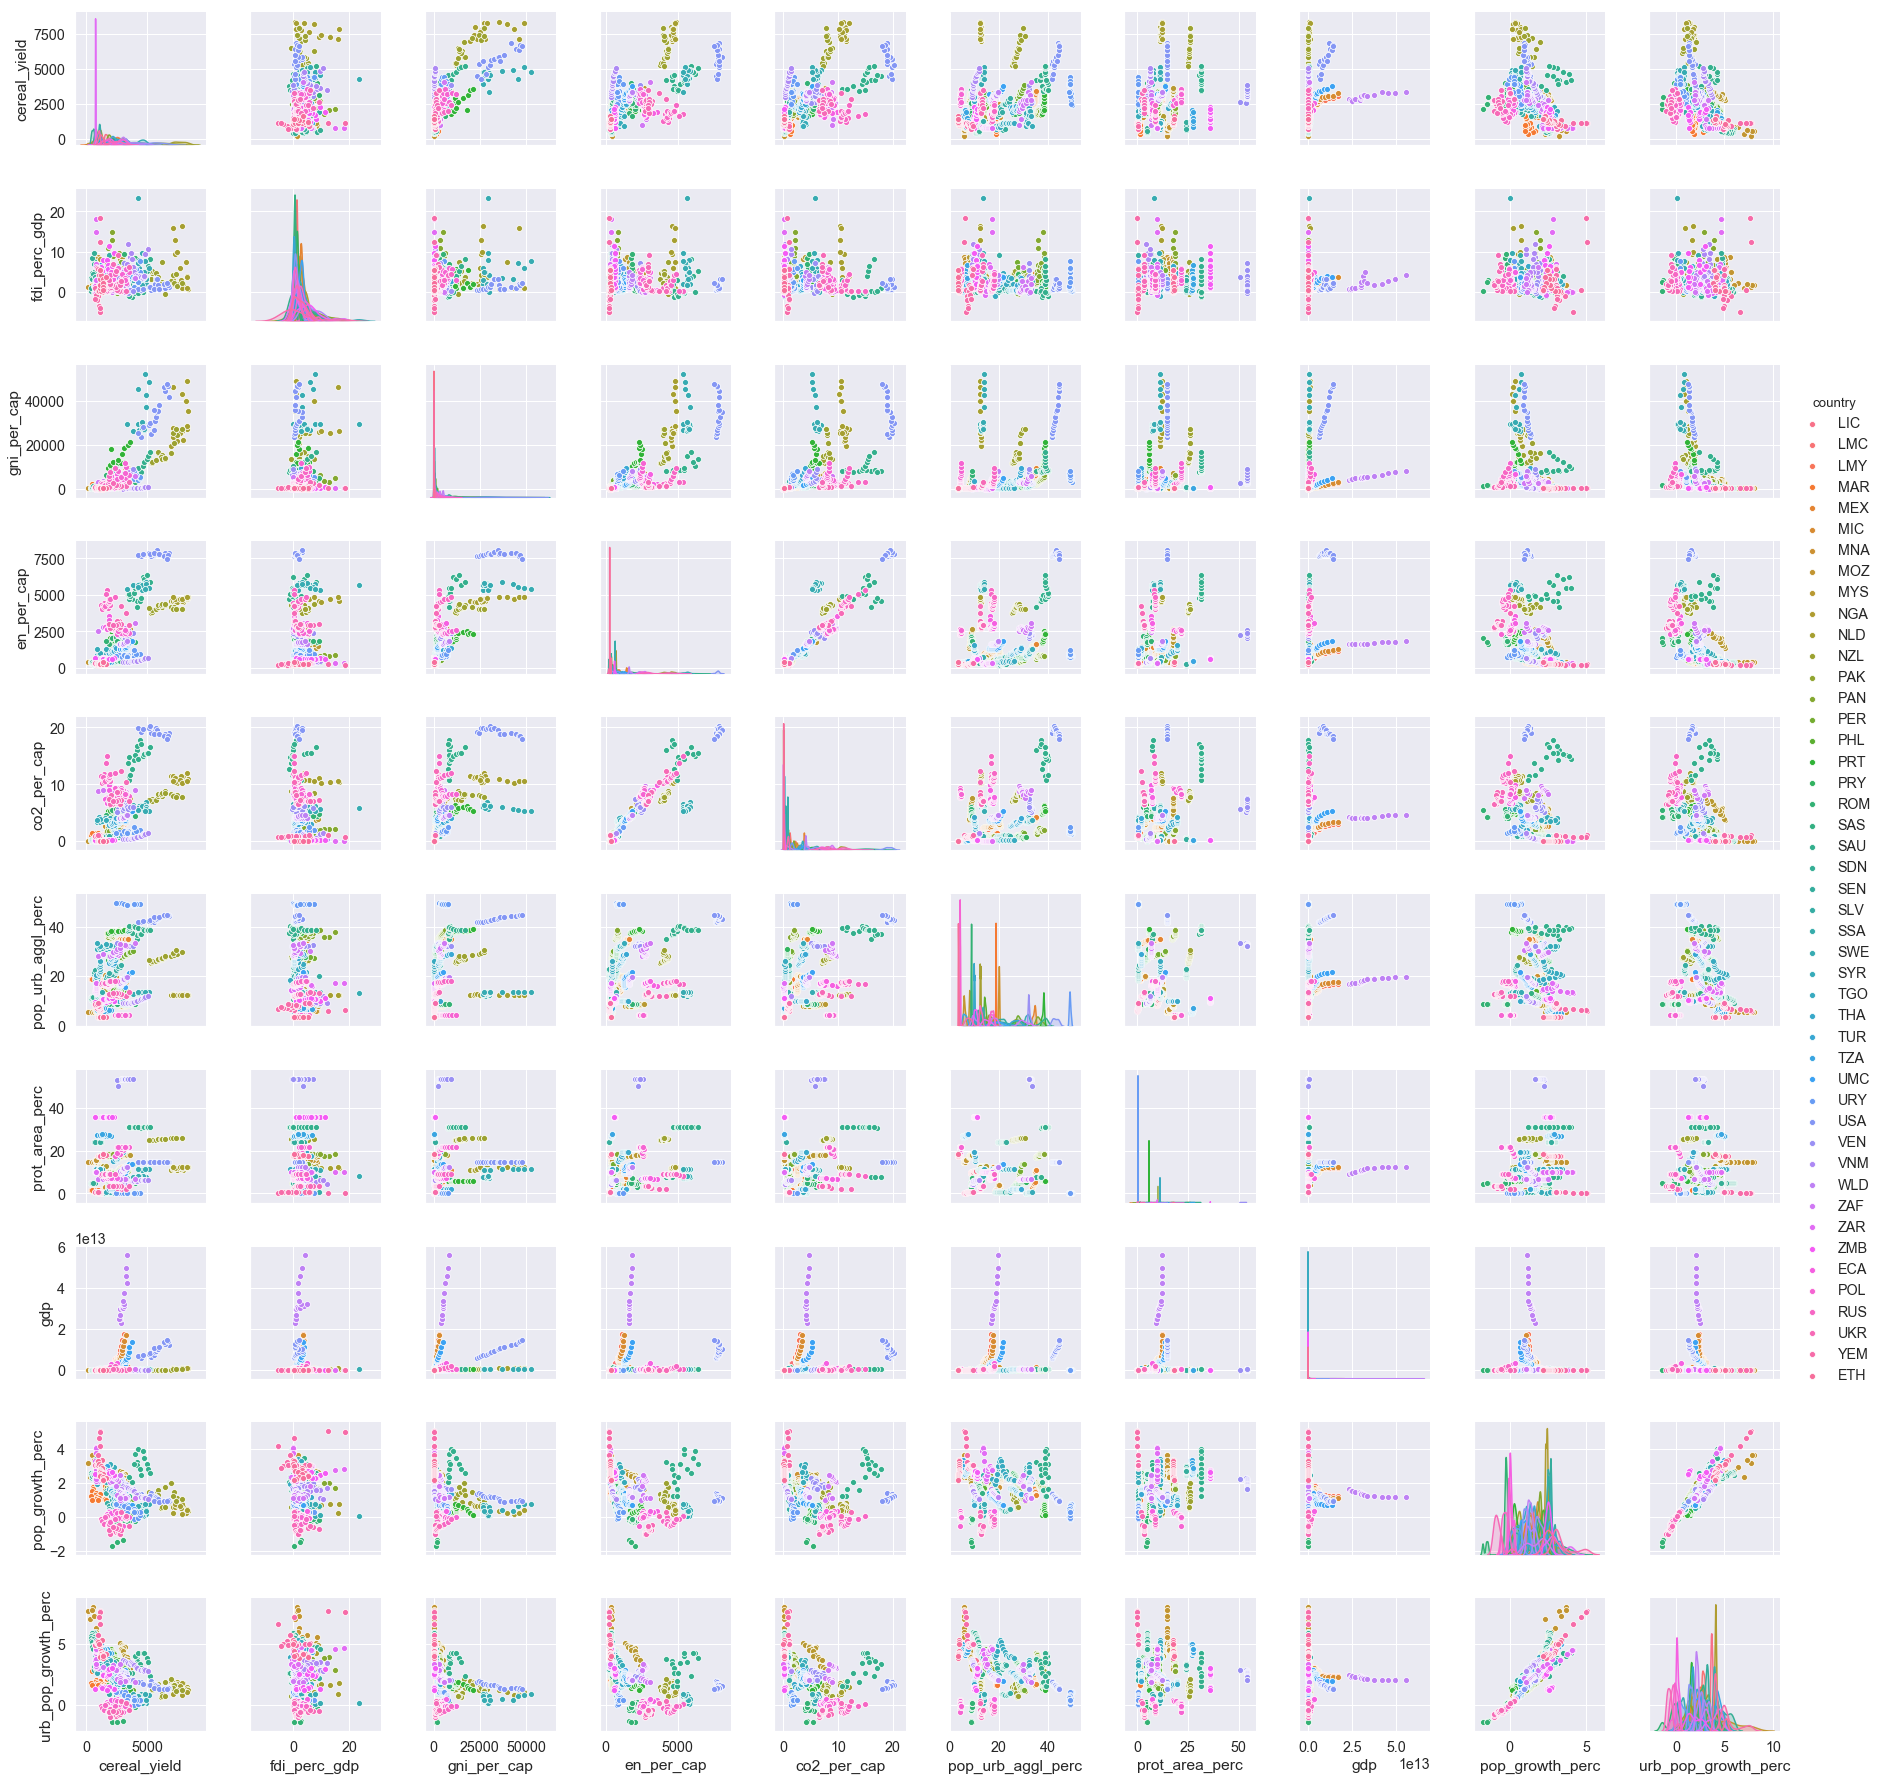

In [17]:
sns.set(font_scale=1.3)
sns.pairplot(data=features_chosen, hue='country')

The most obvious linear dependency of co2_per_cap is with en_per_cap. Apparent hints for nonlinear relationships can be observed in the plots of *co2_per_cap* versus *gni*, *pop_urb_aggl_perc*, *pop_growth_perc*, *urb_pop_growth_perc*.

### 7.2 A closer look onto chosen plots

These dependencies will be explored in more detail for all available countries in the following plots:

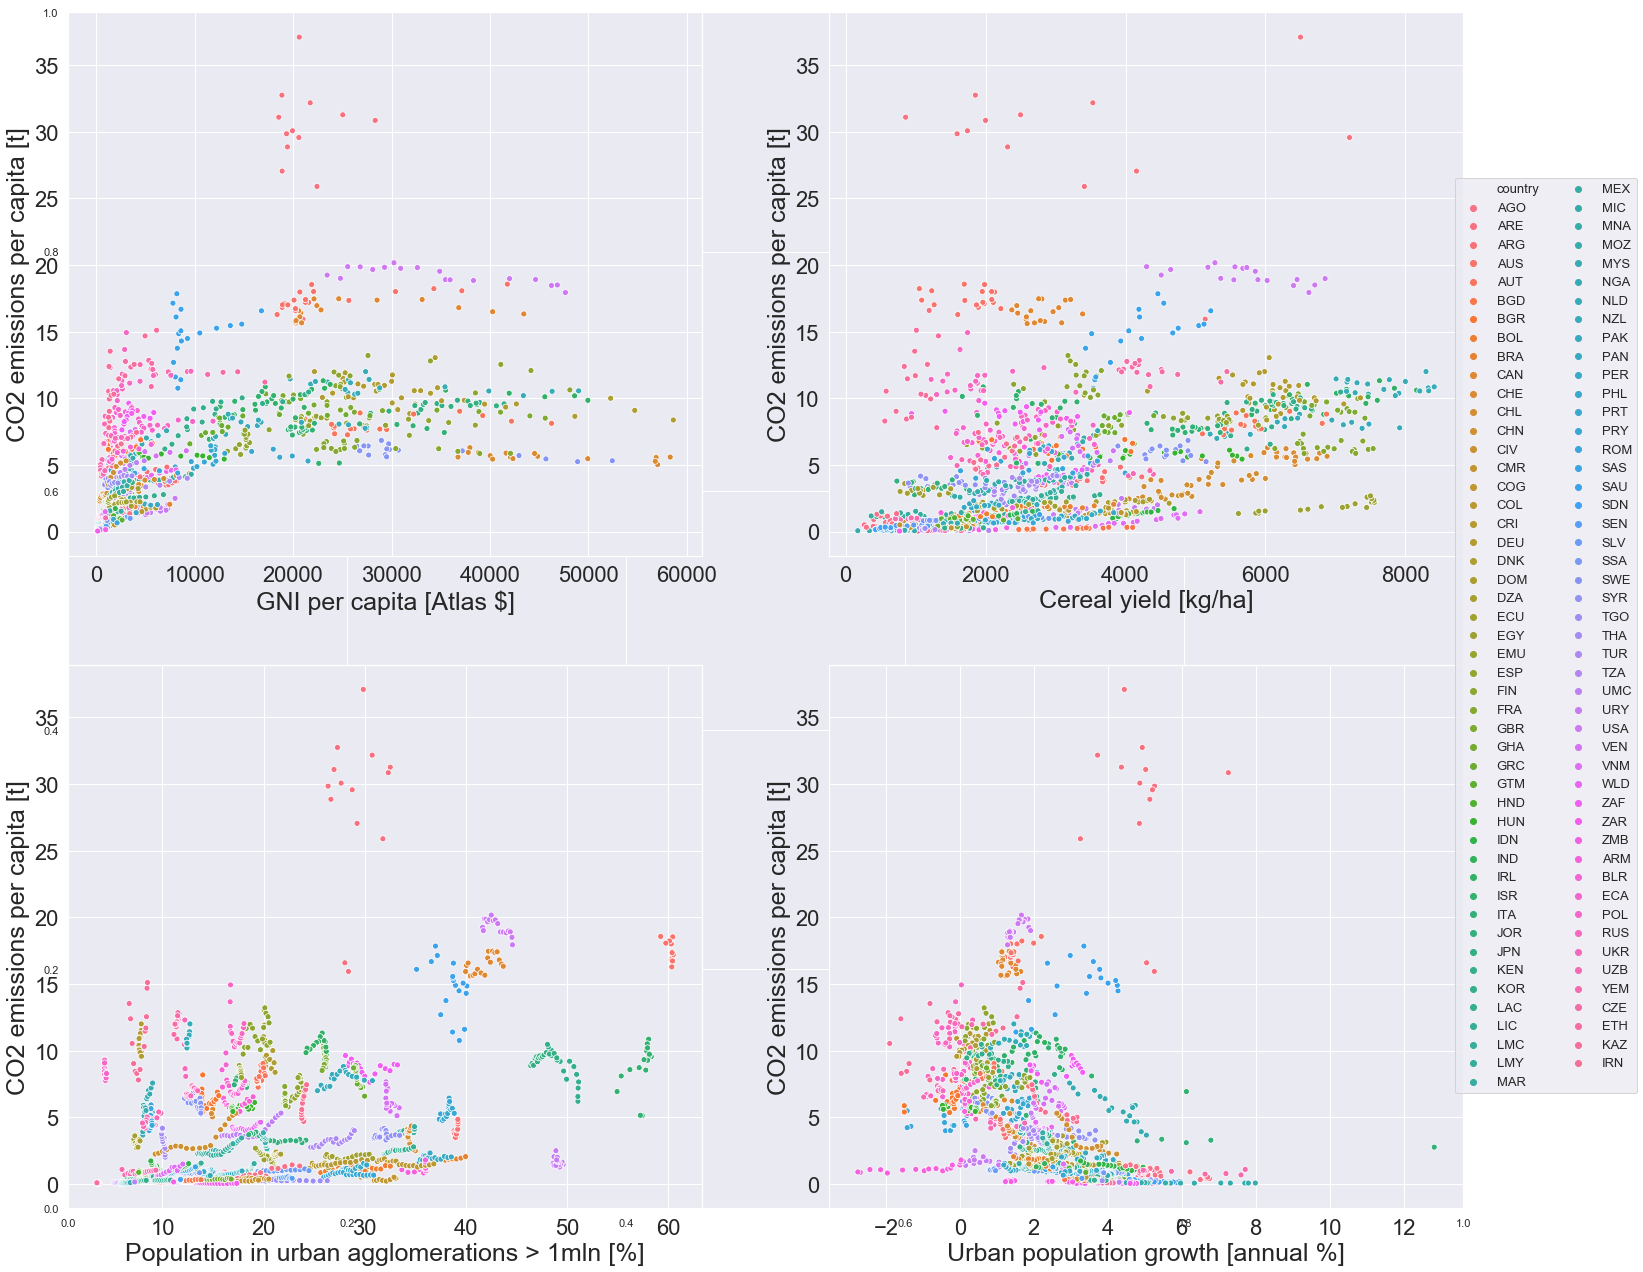

In [12]:
# set default settings of the seaborn library
sns.set()

# plot all scatterplots

fig,ax=plt.subplots(figsize=(25,22))
#fig.subplots_adjust(hspace=0.1, wspace=0.1)
ind=1


# set color theme
sns.set_context("paper")
sns.set(color_codes=True, font_scale=2)

for [col, label] in [['gni_per_cap',labels_dict['gni_per_cap']], ['cereal_yield',labels_dict['cereal_yield']], ['pop_urb_aggl_perc',labels_dict['pop_urb_aggl_perc']], ['urb_pop_growth_perc',labels_dict['urb_pop_growth_perc']]]:
    
    ax = fig.add_subplot(2,2,ind)
    sns.scatterplot(ax=ax, x=col, y="co2_per_cap", data=features, hue="country", legend='full')
    ax.legend_.remove()
    ax.set_xlabel(label, fontsize=25)
    ax.set_ylabel(labels_dict['co2_per_cap'], fontsize=25)
    ind+=1

# create common legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc='center right', fontsize=13)
plt.show()

As a whole, all four diagrams exhibit not only local tendencies for each country (in most cases at least), which are similar, but also global trends for all data points. Worth noticing is also that these trends are nonlinear, but with different structure in all plots, implying different kinds of theoretical contribution to the DV CO2 emissions per capita. This could be a valuable asset for the future prediction of the DV.

#### Outliers
Another aspect that draws the attention is the group of outlier points of the same tome of orange for the range of CO2 emissions per capita between *25t* and *40t*. All of these belong to the data series corresponding to the country of United Arab Emirates (country code *ARE*). Other outliers corresponding to certain countries (same color) can also be identified, which do not disturb the global trends that much though. After removing the rows corresponding to *ARE*, the plots look as follows:

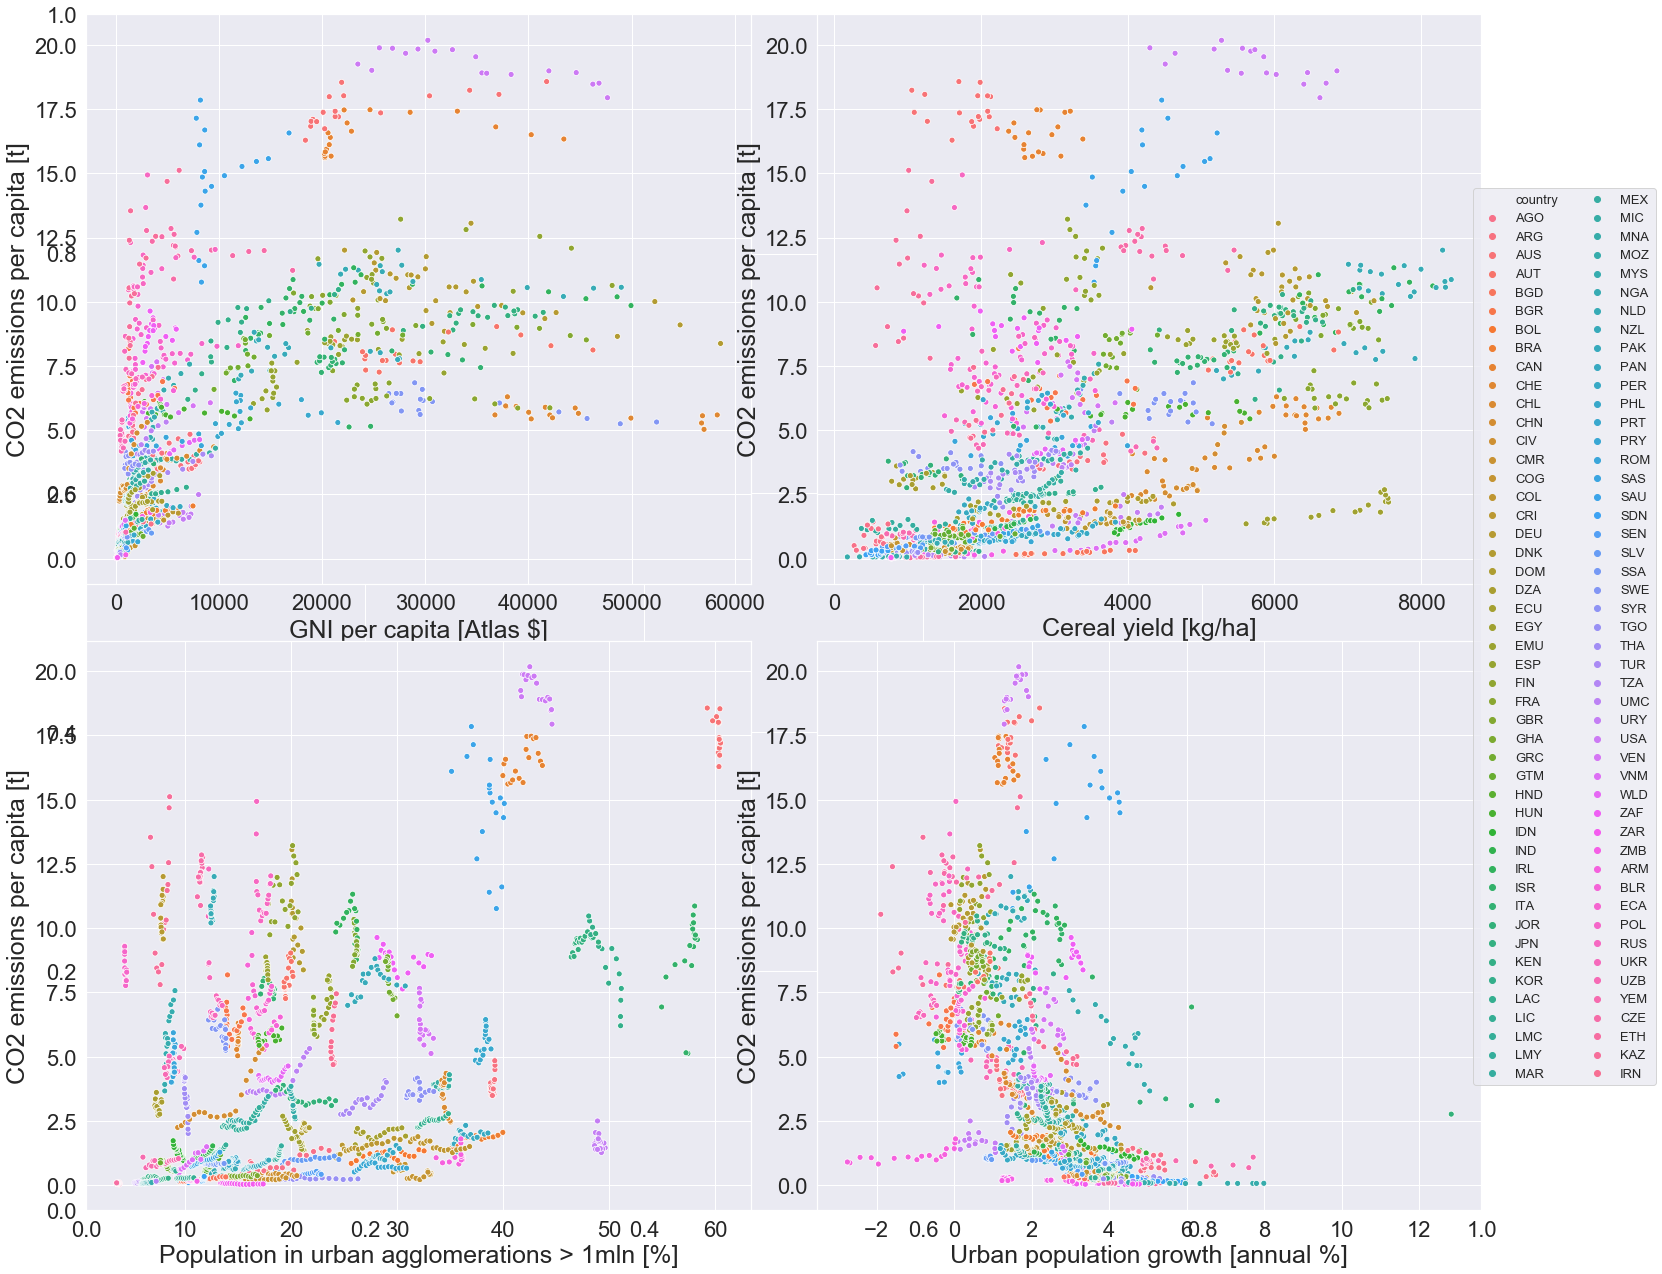

In [13]:
# remove the ARE outliers
features = features[features['country']!="ARE"]

# plot all scatterplots

fig,ax=plt.subplots(figsize=(25,22))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ind=1

# set color theme
sns.set_context("paper")
sns.set(color_codes=True, font_scale=2)

for [col, label] in [['gni_per_cap',labels_dict['gni_per_cap']], ['cereal_yield',labels_dict['cereal_yield']], ['pop_urb_aggl_perc',labels_dict['pop_urb_aggl_perc']], ['urb_pop_growth_perc',labels_dict['urb_pop_growth_perc']]]:
    ax = fig.add_subplot(2,2,ind)
    sns.scatterplot(ax=ax, x=col, y="co2_per_cap", data=features, hue="country", legend='full')
    ax.legend_.remove()
    ax.set_xlabel(label, fontsize=25)
    ax.set_ylabel(labels_dict['co2_per_cap'], fontsize=25)
    ind+=1

# create common legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc='center right', fontsize=13)
plt.show()


After removing the outliers of a single country, the trends have become even more visible.

The following plot shows the relationsip between 4 variables:

Text(78.37033880208335, 0.5, 'CO2 emissions per capita [t]')

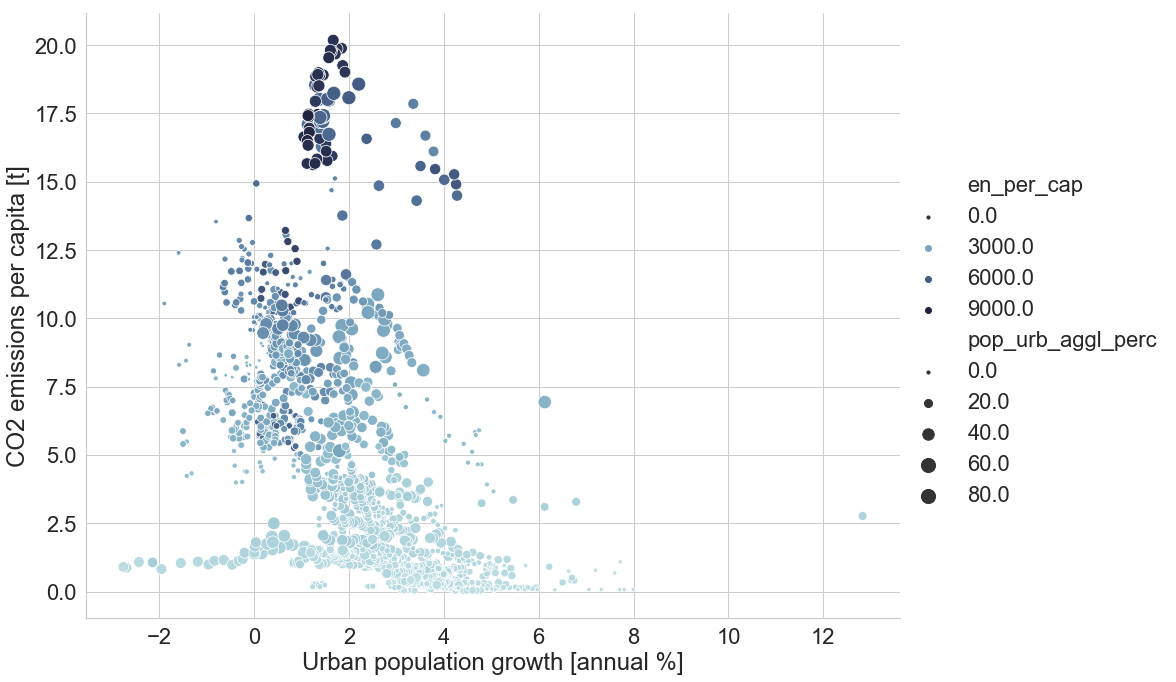

In [16]:
# 4d plot

sns.set(style="whitegrid", font_scale=2)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=features,
    x="urb_pop_growth_perc", y="co2_per_cap",
    hue="en_per_cap", size="pop_urb_aggl_perc",
    palette=cmap, sizes=(10, 200),
    height=10, aspect= 4/3
)

g.ax.set_xlabel(labels_dict['urb_pop_growth_perc'])
g.ax.set_ylabel(labels_dict['co2_per_cap'])

***

## 8. Visualization conclusions

Valuable insights have been gained through targeted plotting of relevant dependencies for the further predictive analysis:

* The variables representing CO2 emissions and energy use both referred to the population count (per capita) are related to more features and are taken for further analysis.
* The population count feature is therefore not useful any more and removed.
* The CO2 emissions per capita exhibit strong linear dependency on energy use and show nonlinear relationships with other variables.
* In most cases are visible not only local trends for each single country but also global trends for all observations. The global trends can in certain cases be divided into multiple data point paths for certain groups of countries or clusters of countries.
* Groups of outliers with the same colors corresponding to certain countries have been detected. The group that stands out the most from the global trends origins from the data series on the United Arab Emirates (country code *ARE*). This can additionally be considered during data selection for the predictive analysis.
* The pronounced nonlinear character of the majority of dependencies as well as the clustered points of certain countries are indications against some and in favour of other machine learning algorithms for the predictive analysis. This would suggest the use of algorithms capable to handle nonlinearities and groups of points easily (e.g. Random Forest), rather than algorithms designed to describe linear relationships (e.g. Linear Regression).


***

Copyright (c) 2020 Vladislav Todorov